In [33]:
# Data science libraries
# Feel free to add any we may need or remove the ones we don't.

import pandas as pd
import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import bernoulli
from scipy.stats import binom

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
# Dataframe uploads
df_ivr1 = pd.read_csv('file_3_Mar18_Output_1.csv')
df_ivr2 = pd.read_csv('file_4_Mar18_Output_1.csv')

In [35]:
# Combining seperate dataframes
df = pd.concat([df_ivr1,df_ivr2])
len(df) == len(df_ivr2) + len(df_ivr1)

True

In [36]:
# Length of dataframe
len(df)

1798798

In [37]:
# Rename eservice_ind
df['eservice_ind_13_march'].replace(1, 'enrolled', inplace = True)
df['eservice_ind_13_march'].replace(0, 'not enrolled', inplace = True)
df['eservice_ind_18_march'].replace(1, 'enrolled', inplace = True)
df['eservice_ind_18_march'].replace(0, 'not enrolled', inplace = True)

# Rename card_activation_status
df['card_activation_status_13_march'].replace([0, '0', ' ', math.nan], 'Activated', inplace = True)
df['card_activation_status_13_march'].replace([7, '7'], 'New Account Number not Activated', inplace = True)
df['card_activation_status_13_march'].replace([8, '8'], 'Same Account Number not Activated', inplace = True)
df['card_activation_status_13_march'].replace([9, '9'], 'Activated Today', inplace = True)

df['card_activation_status_18_march'].replace([0, '0', ' ', math.nan], 'Activated', inplace = True)
df['card_activation_status_18_march'].replace([7, '7'], 'New Account Number not Activated', inplace = True)
df['card_activation_status_18_march'].replace([8, '8'], 'Same Account Number not Activated', inplace = True)
df['card_activation_status_18_march'].replace([9, '9'], 'Activated Today', inplace = True)

# Rename account_status
df['account_status_13_march'].replace('A', 'Authorization Prohibited (open but on hold)', inplace = True)
df['account_status_13_march'].replace('B', 'Bankrupt (closed)', inplace = True)
df['account_status_13_march'].replace('C', 'Closed', inplace = True)
df['account_status_13_march'].replace('E', 'Closed (Revoked)', inplace = True)
df['account_status_13_march'].replace('F', 'Closed (Frozen)', inplace = True)
df['account_status_13_march'].replace('I', 'Closed (Intrest Accrual Prohibited)', inplace = True)
df['account_status_13_march'].replace('Z', 'Closed (Charge off Adjustment)', inplace = True)
df['account_status_13_march'].replace('L', 'Lost (New Account # issued)', inplace = True)
df['account_status_13_march'].replace('U', 'Stolen (New Account # issued)', inplace = True)
df['account_status_13_march'].replace([' ', math.nan], 'Open (no restrictions)', inplace = True)

df['account_status_18_march'].replace('A', 'Authorization Prohibited (open but on hold)', inplace = True)
df['account_status_18_march'].replace('B', 'Bankrupt (closed)', inplace = True)
df['account_status_18_march'].replace('C', 'Closed', inplace = True)
df['account_status_18_march'].replace('E', 'Closed (Revoked)', inplace = True)
df['account_status_18_march'].replace('F', 'Closed (Frozen)', inplace = True)
df['account_status_18_march'].replace('I', 'Closed (Intrest Accrual Prohibited)', inplace = True)
df['account_status_18_march'].replace('Z', 'Closed (Charge off Adjustment)', inplace = True)
df['account_status_18_march'].replace('L', 'Lost (New Account # issued)', inplace = True)
df['account_status_18_march'].replace('U', 'Stolen (New Account # issued)', inplace = True)
df['account_status_18_march'].replace([' ', math.nan], 'Open (no restrictions)', inplace = True)

# Rename ebill_enrolled_status
df['ebill_enrolled_status_13_march'].replace('E', 'Electronic Only', inplace = True)
df['ebill_enrolled_status_13_march'].replace(' ', 'Paper Only', inplace = True)
df['ebill_enrolled_status_13_march'].replace('D', 'Does not Participate in EBP', inplace = True)
df['ebill_enrolled_status_13_march'].replace('B', 'Hard Copy and Electronic statement', inplace = True)
df['ebill_enrolled_status_13_march'].replace('L', 'Hard Copy and Electronic statement always', inplace = True)
df['ebill_enrolled_status_13_march'].replace(math.nan, 'Paper Only', inplace = True)

df['ebill_enrolled_status_18_march'].replace('E', 'Electronic Only', inplace = True)
df['ebill_enrolled_status_18_march'].replace(' ', 'Paper Only', inplace = True)
df['ebill_enrolled_status_18_march'].replace('D', 'Does not Participate in EBP', inplace = True)
df['ebill_enrolled_status_18_march'].replace('B', 'Hard Copy and Electronic statement', inplace = True)
df['ebill_enrolled_status_18_march'].replace('L', 'Hard Copy and Electronic statement always', inplace = True)
df['ebill_enrolled_status_18_march'].replace(math.nan, 'Paper Only', inplace = True)

# Rename auto_pay_enrolled_status
df['auto_pay_enrolled_status_13_march'].replace(0, 'Not Enrolled', inplace = True)
df['auto_pay_enrolled_status_13_march'].replace(1, 'Enrolled', inplace = True)

df['auto_pay_enrolled_status_18_march'].replace(0, 'Not Enrolled', inplace = True)
df['auto_pay_enrolled_status_18_march'].replace(1, 'Enrolled', inplace = True)

In [38]:
# Cleaning delinquency_history (if the first number is more than two + the second number take it out)
df = df[df['delinquency_history_13_march'].isin(['[00]', '[02]', '[03]', '[22]', '[32]', '[43]', '[23]', '[54]', '[76]', '[07]', '[08]', '[88]', '[25]', '[05]', '[56]',
                                                       '[04]', '[06]', '[33]', '[65]', '[34]', '[35]', '[48]', '[24]', '[87]', '[44]', '[66]', '[37]', '[55]', '[38]', '[47]',
                                                       '[78]', '[46]', '[58]', '[45]', '[57]', '[67]', '[26]', '[27]', '[68]', '[77]', '[36]'])]
df = df[df['delinquency_history_18_march'].isin(['[00]', '[02]', '[03]', '[22]', '[32]', '[43]', '[23]', '[54]', '[76]', '[07]', '[08]', '[88]', '[25]', '[05]', '[56]',
                                                        '[04]', '[06]', '[33]', '[65]', '[34]', '[35]', '[48]', '[24]', '[87]', '[44]', '[66]', '[37]', '[55]', '[38]', '[47]',
                                                        '[78]', '[46]', '[58]', '[45]', '[57]', '[67]', '[26]', '[27]', '[68]', '[77]', '[36]',])]

In [39]:
# Clean number of accounts
df = df[df['no_of_accounts_with_syf_13_march'] < 40]

In [40]:
# Clean account balance
df = df[df['account_balance_13_march'] < 4100]

In [41]:
# Clean and Create Account Open Year
df['account_open_year_13_march'] = df['account_open_date_13_march'].str.strip().str[-4:].astype(int)
df = df[df['account_open_year_13_march'] > 2006]

In [42]:
# Drop NA values
df = df.dropna()

In [43]:
# Split up Delinquent History
def extract_numbers(value):
    value = value.strip('[]')  # Remove square brackets
    first_num = int(value[0])   # Extract first number
    last_num = int(value[-1])   # Extract last number
    return first_num, last_num

df[['delinquency_history_current_13_march', 'delinquency_history_previous_13_march']] = df['delinquency_history_13_march'].apply(lambda x: pd.Series(extract_numbers(x)))

In [44]:
df['resolved'].replace(0, 'floor', inplace = True)
df['resolved'].replace(1, 'resolved', inplace = True)

In [45]:
df['delinquency_history_13_march'].unique()

array(['[00]', '[03]', '[02]', '[32]', '[22]', '[43]', '[23]', '[54]',
       '[76]', '[07]', '[08]', '[88]', '[05]', '[56]', '[04]', '[06]',
       '[33]', '[25]', '[65]', '[34]', '[35]', '[48]', '[24]', '[87]',
       '[44]', '[55]', '[46]', '[26]', '[58]', '[68]', '[45]', '[47]',
       '[57]', '[36]', '[67]', '[77]', '[78]', '[27]', '[66]', '[37]'],
      dtype=object)

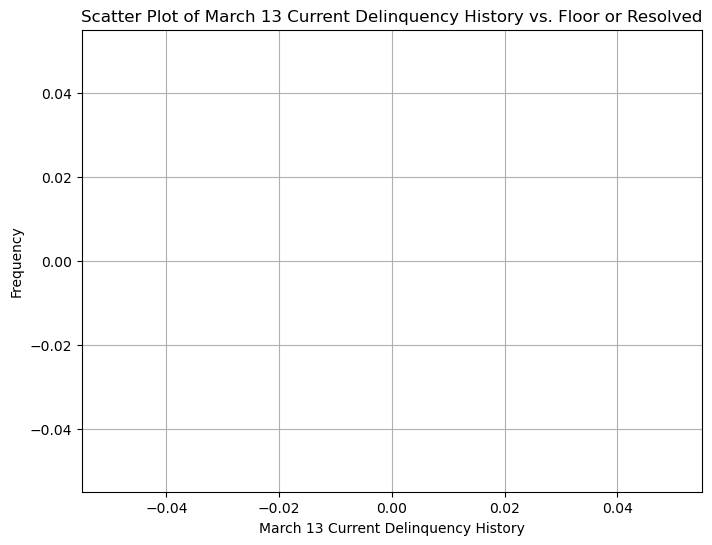

In [46]:
# Scatter Plot of March 13 Current Delinquency History vs. Floor or Resolved
plt.figure(figsize=(8, 6))
colors = {1: 'red', 0: 'blue'}  # Define colors for categories
plt.scatter(df['delinquency_history_current_13_march'], range(len(df)), c=df['resolved'].map(colors), label=df['resolved'])
plt.xlabel('March 13 Current Delinquency History')
plt.ylabel('Frequency')
plt.title('Scatter Plot of March 13 Current Delinquency History vs. Floor or Resolved')
plt.grid(True)
plt.show()
# Check google Colab

In [47]:
# Scatter Plot of March 13 Previous Delinquency History vs. Floor or Resolved
plt.figure(figsize=(8, 6))
colors = {1: 'red', 0: 'blue'}  # Define colors for categories
plt.scatter(df['delinquency_history_previous_18_march'], range(len(df)), c=df['resolved'].map(colors), label=df['resolved'])
plt.xlabel('March 18 Previous Delinquency History')
plt.ylabel('Frequency')
plt.title('Scatter Plot of March 18 Previous Delinquency History vs. Floor or Resolved')
plt.grid(True)
plt.show()
# Check google Colab

KeyError: 'delinquency_history_previous_18_march'

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='eservice_ind_18_march', ylabel='count'>

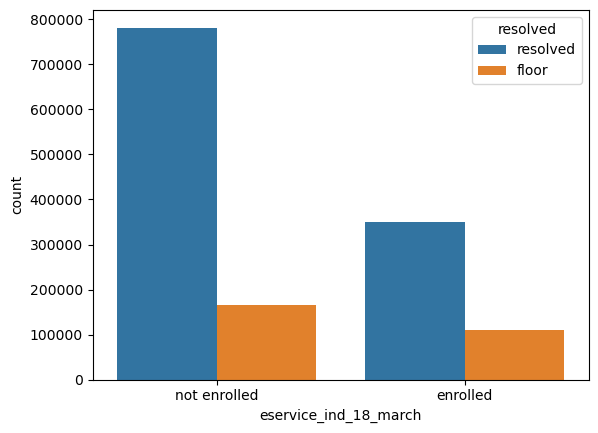

In [48]:
# Bar Graph Analyses, no association
sns.countplot(x = "eservice_ind_18_march", hue = 'resolved', data = df)

<Axes: xlabel='eservice_ind_18_march'>

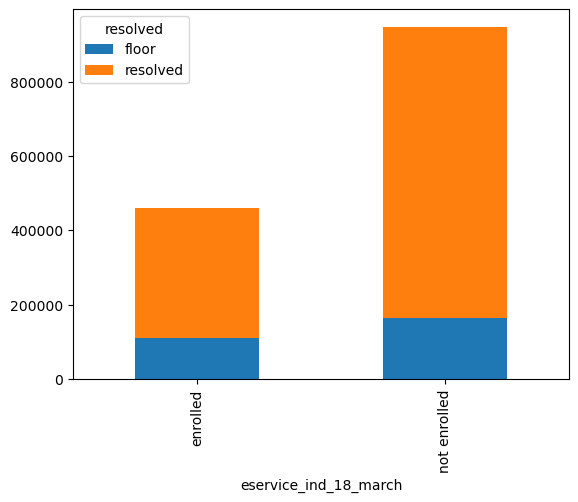

In [49]:
pd.crosstab(df['eservice_ind_18_march'], df['resolved']).plot.bar(stacked = True)

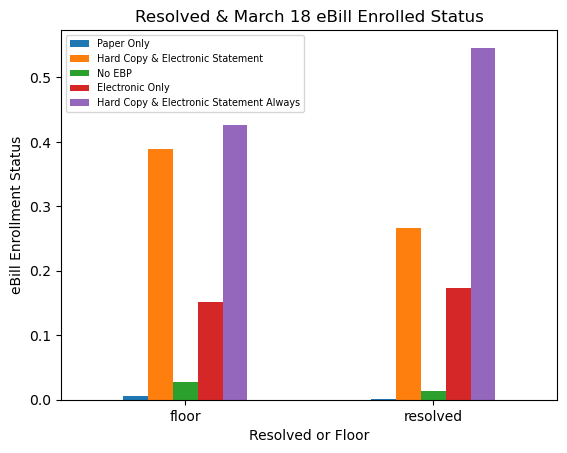

In [50]:
temp = pd.crosstab(df["resolved"],df["ebill_enrolled_status_18_march"],normalize="index") 
temp
temp.plot.bar()
plt.title("Resolved & March 18 eBill Enrolled Status")
plt.xlabel("Resolved or Floor")
plt.xticks(rotation=360)
plt.ylabel("eBill Enrollment Status")
plt.legend(['Paper Only','Hard Copy & Electronic Statement','No EBP', 'Electronic Only','Hard Copy & Electronic Statement Always'],loc="upper left",fontsize='x-small')
plt.show()

In [55]:
# Calls that went to Floor
df_floor=df[df["resolved"]=="floor"]


In [54]:
# Calls that did not go to Floor
df_resolved=df[df["resolved"]=="resolved"]


In [61]:
# Top 10 reasons why a call went to the floor
df_top_10_floor = df_floor.groupby("reason").agg("count").reset_index().nlargest(10,"resolved")
df_top_10_floor.rename(columns={"resolved":"floor"})
df_top_10_floor['count'] = df_top_10_floor['mos']
df_top_10_floor[['reason', 'count']]

,reason,count
4,BA,121320
30,PP,27470
10,CT,17267
32,PT,13712
0,AA,10227
14,FD,8573
65,wa,7382
23,LS,7132
2,AT,6695
22,LC,5730


In [59]:
# List of those values
df_resolvedlist = df_floor[df_floor['reason'].isin(['BA','PP','CT','PT','AA','wa','FD','LS','AT','LC'])]

In [63]:
# Same reasons but in resolved
df_resolvedlist = df_resolved[df_resolved['reason'].isin(['BA','PP','CT','PT','AA','wa','FD','LS','AT','LC'])]
df_top_10_resolved = df_resolvedlist.groupby("reason").agg("count").reset_index().nlargest(10,"resolved")
df_top_10_resolved['count'] = df_top_10_resolved['mos']
df_top_10_resolved = df_top_10_resolved[['reason', 'count']]
df_top_10_resolved

,reason,count
7,PP,520672
2,BA,315324
8,PT,158004
1,AT,69527
0,AA,27325
6,LS,3424
5,LC,1929
9,wa,656
3,CT,526
4,FD,358


BA = Account Summary

PP = PBP Predictive

CT = CIT change in terms

PT = PBP Request

AA =Activation

wa = Request waiver

FD = Fraud detect

LS Report Lost Stolen

AT- Account trasaction

LC = Live chat 

In [65]:
# Retailers that caused the most calls to the floor
df_retailer_floor = df_floor.groupby("retailer_code").agg("count").reset_index()
df_retailer_floor = df_retailer_floor[['retailer_code', 'mos']]
df_retailer_floor.sort_values(by = 'mos',ascending=False)

,retailer_code,mos
25,a,38862
0,A,32618
26,b,30471
1,B,25778
28,d,23357
2,C,17883
3,D,16337
27,c,14835
4,E,12638
30,f,9279


In [66]:
# Retailers that caused the most resolved calls
df_retailer_resolved = df_resolved.groupby("retailer_code").agg("count").reset_index()
df_retailer_resolved = df_retailer_resolved[['retailer_code', 'mos']]
df_retailer_resolved.sort_values(by = 'mos',ascending=False)

,retailer_code,mos
1,B,149903
24,a,126855
25,b,104651
0,A,104090
3,D,102268
2,C,86343
4,E,63384
27,d,55120
26,c,52247
28,e,40719


In [67]:
# Merge
merged_result = pd.merge(df_retailer_floor, df_retailer_resolved, on='retailer_code')
merged_result

,retailer_code,mos_x,mos_y
0,A,32618,104090
1,B,25778,149903
2,C,17883,86343
3,D,16337,102268
4,E,12638,63384
5,F,3279,16564
6,G,3932,9801
7,H,2101,9446
8,I,2796,15731
9,J,1526,10397


In [68]:
column_mapping = {'mos_y': 'retailer_resolved', 'mos_x': 'retailer_floor'}
merged_result.rename(columns=column_mapping, inplace=True)
merged_result['percent'] = merged_result['retailer_floor'] / (merged_result['retailer_floor'] + merged_result['retailer_resolved'])
merged_result.sort_values(by = 'percent', ascending = False)

,retailer_code,retailer_floor,retailer_resolved,percent
42,s,64,1,0.984615
20,U,74,48,0.606557
19,T,137,103,0.570833
43,t,12,18,0.400000
35,l,4009,7256,0.355881
16,Q,532,1080,0.330025
27,d,23357,55120,0.297629
6,G,3932,9801,0.286318
21,W,20,58,0.256410
0,A,32618,104090,0.238596
